# Data Dictionary 


id: Unique id of the loan

member_id: Id of the member to took out the loan

loan_amount: Amount of loan the applicant received

funded_amount: The total amount committed to the loan at that point in time

funded_amount_inv: The total amount committed by investors for that loan at that point in time

term: The number of monthly payments for the loan

int_rate (APR): Annual (APR) interest rate of the loan

instalment: The monthly payment owned by the borrower. This is inclusive of the interest.

grade: Loan company (LC) assigned loan grade

sub_grade: LC assigned loan sub grade

employment_length: Employment length in years

home_ownership: The home ownership status provided by the borrower

annual_inc: The annual income of the borrower

verification_status: Indicates whether the borrowers income was verified by the LC or the income source was verified

issue_date: Issue date of the loan

loan_status: Current status of the loan

payment_plan: Indicates if a payment plan is in place for the loan. Indication borrower is struggling to pay.

purpose: A category provided by the borrower for the loan request

dti: A ratio calculated using the borrower's total monthly debt payments on the total debt obligations, excluding mortgage and the 

requested LC loan, divided by the borrower’s self-reported monthly income

delinq_2yr: The number of 30+ days past-due payments in the borrower's credit file for the past 2 years

earliest_credit_line: The month the borrower's earliest reported credit line was opened

inq_last_6mths: The number of inquiries in past 6 months (excluding auto and mortgage inquiries)

mths_since_last_record: The number of months' since the last public record

open_accounts: The number of open credit lines in the borrower's credit file

total_accounts: The total number of credit lines currently in the borrower's credit file

out_prncp: Remaining outstanding principal for total amount funded

out_prncp_inv: Remaining outstanding principal for portion of total amount funded by investors

total_payment`: Payments received to date for total amount funded

total_rec_int: Interest received to date

total_rec_late_fee: Late fees received to date

recoveries: Post charge off gross recovery

collection_recovery_fee: Post charge off collection fee

last_payment_date: Date on which last month payment was received

last_payment_amount: Last total payment amount received

next_payment_date: Next scheduled payment date

last_credit_pull_date: The most recent month LC pulled credit for this loan

collections_12_mths_ex_med: Number of collections in 12 months' excluding medical collections

mths_since_last_major_derog: Months' since most recent 90-day or worse rating

policy_code: Publicly available policy_code=1 new products not publicly available policy_code=2

application_type: Indicates whether the loan is an individual application or a joint application with two co-borrowers

#Current State of the Loans 

While performing the analysis in this milestone it can be helpful to have the data dictionary on hand to get an overview of what each column represents. The data dictionary is displayed in Milestone 2 task 3.

We will query the data to check the current state of the payments:
Summarise currently what percentage of the loans are recovered against the investor funding and the total amount funded. Visualise your results on an appropriate graph.
Additionally visualise what percentage of the total amount would be recovered up to 6 months' in the future.


Percentage of loans recovered against total investor amount funded: 
21.25
Percentage of loans recovered against total amount funded: 
20.92
The number of loans fully paid off is: 27037
The percentage of loans to be recovered in the next 6 months is: 18.24%


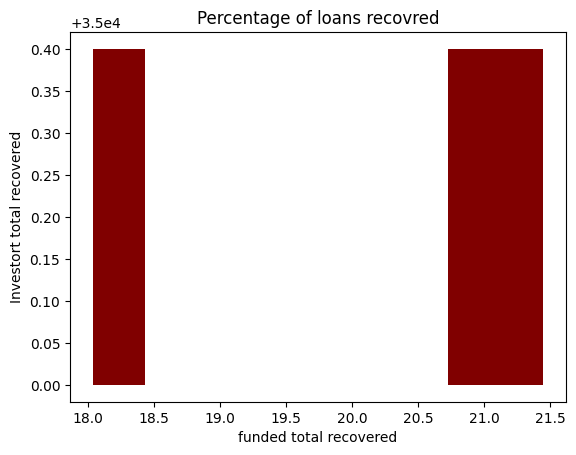

In [2]:
import pandas as pd 
import matplotlib.pyplot as plt

#get the dataframe
df = pd.read_csv('/Users/jawadelamri/EDA_Frameinfo_loan_payments.csv') 

#find investor totals
funded_inv = sum(df['funded_amount_inv'])
prncp_inv = sum(df['out_prncp_inv'])

#calculate %
print('Percentage of loans recovered against total investor amount funded: ')
investor_funding = (prncp_inv / funded_inv) * 100
print(round(investor_funding,2))

#find normal totals
funded = sum(df['funded_amount'])
prncp = sum(df['out_prncp'])

#calculate %
print('Percentage of loans recovered against total amount funded: ')
total_amount_funded = ((prncp)/ (funded)) * 100
print(round(total_amount_funded,2))


def fully_recovered():
    """
    Function finds how many entries are made for 'Fully Paid" in loan_status column
    
    """
    list_fully_recovered = []
    for col in df['loan_status']:
        if col == 'Fully Paid':
            list_fully_recovered.append(col)
    print(f"The number of loans fully paid off is: {len(list_fully_recovered)}")

fully_recovered()

#calcuate % recoved in next 6 months 
percentage_recovered_in_6_months = (sum(df['instalment'])*6) / sum(df['funded_amount']) * 100
print(f"The percentage of loans to be recovered in the next 6 months is: {round(percentage_recovered_in_6_months,2)}%")


Amount_recovered = [investor_funding, total_amount_funded, percentage_recovered_in_6_months]

#plot bar chart 
plt.bar(x= Amount_recovered, y = 35000 , height= .4,  width = 0.4, bottom = 70, color ='maroon')
 
plt.xlabel("funded total recovered")
plt.ylabel("Investort total recovered")
plt.title("Percentage of loans recovred")
plt.show()



#Calcualting Loss   

The company wants to check what percentage of loans have been a loss to the company:
Loans marked as Charged Off in the loan_status column represent a loss to the company.

Calculate the percentage of charged off loans historically and the total amount that was paid towards these loans before being charged off.

In [3]:
def percentage_of_loans_charged_off():
    """ Function calculates the percentage of loans that have been charged off.
    """
    list_charged_off = []
    for col in df['loan_status']:
        if col == 'Charged Off':
            list_charged_off.append(col) 
    charged_off = ((len(list_charged_off)) / len(df['loan_amount'])) * 100
    print(f"The percentage of loans charged paid off is: {round(charged_off,2)}%")
  

percentage_of_loans_charged_off() 

#calcuated total paid off from charged off loans
filter_charged_off = df[df['loan_status'] == 'Charged Off']
payment_charged_off = filter_charged_off['total_payment']
total_charged_off = payment_charged_off.sum()
print(f"Total paid off from charged loans is: {round(total_charged_off,2)}")


The percentage of loans charged paid off is: 10.27%
Total paid off from charged loans is: 37400589.04


#Calculating Projected Loss

Calculate the projected loss of the loans marked as Charged Off.

Calculate the loss in revenue these loans would have generated for the company if they had finished their term. Visualise the loss projected over the remaining term of these loans.

In [4]:
#find charged off before term end 
#expected revenue = instalment * term 
#calcualte expected revenue and subtract actual revenue 


filter_charged_off = df[df['loan_status'] == 'Charged Off']
instalment_charged_off = sum(filter_charged_off['instalment'])
term_charged_off = sum(filter_charged_off['term'])
expected_revenue = (instalment_charged_off * term_charged_off )
print(f"The expected revenue is: {round(expected_revenue,2)}")
print(f"The actual revenue is: {round(total_charged_off,2)}")

lost_revenue = (expected_revenue - total_charged_off)
print(f"The total revenue lost is: {round(lost_revenue,2)}")

#find percentage of revenue lost 

percentage_lost = ((lost_revenue/expected_revenue)) * 100
print(f"The percentage of revenue lost is: {round(percentage_lost,2)}")


The expected revenue is: 569608306371.72
The actual revenue is: 37400589.04
The total revenue lost is: 569570905782.68
The percentage of revenue lost is: 99.99


#Possible Loss

There are customers who are currently behind with their loan payments. This subset of customers represent a risk to company revenue.

What percentage do users' in this bracket currently represent as a percentage of all loans? Calculate the total amount of customers in this bracket and how much loss the company would incur their status was changed to Charged Off. What is the projected loss of these loans if the customer were to finish the full loans term?

If customers late on payments converted to Charged Off, what percentage of total expected revenue do these customers and the customers who have already defaulted on their loan represent?

In [5]:
#find the number of customers who are late with their payments 

filter_late = df[df['loan_status'] == 'Late (31-120 days)']
print(f"The number of customers who are behind on payments is: {len(filter_late)}")

# find the % of people who are late on payments 

percentage_late = (580 / len(df)) * 100

print(f"The percentage of people behind on loans is : {round(percentage_late,2)}%")


#loss incured to company if late loans were charged off
#find instalments made then instalments left

instalment_late = filter_late['instalment']
term_late = filter_late['term']
recovered_late = filter_late['total_payment']

#find number of payments made 
num_instalments = (recovered_late / instalment_late)

#find number of payments left to make 
instalments_owed = (term_late / num_instalments)

possible_loss = sum((instalments_owed * instalment_late))

print(f"The possible loss from charging off late loans is: {round(possible_loss,2)}")

#percenttage of customers already charged off 
#total charged off loans / total df entried 

#percentage_possible_loss = ((len(filter_late) + len(filter_charged_off)) / len(df['loan_status']))  * 100
print(f"Number of late loans is: {len(filter_late)}")
print(f"Number of charged off loans is: {len(filter_charged_off)}")
print(f"Total loans in the df is: {len(df['loan_status'])}")
percentage_lost_poss = ((580 + 5571) / 54231) * 100
print(f"The percentage of all possible charged off loans is: {round(percentage_lost_poss,2)}%")



The number of customers who are behind on payments is: 580
The percentage of people behind on loans is : 1.07%
The possible loss from charging off late loans is: 647564.87
Number of late loans is: 580
Number of charged off loans is: 5571
Total loans in the df is: 54231
The percentage of all possible charged off loans is: 11.34%


#Indicators of Loss 

In this task you will be analysing the data to visualise the possible indicators that a customer will not be able to pay the loan.

You will want to compare columns which might be indicators against customers who have already stopped paying and customers who are currently behind on payments.

Here are some example columns that might indicate that a user might not pay the loan:


Does the grade of the loan have effect on customers not paying?


Is the purpose for the loan likely to have an effect?

Does the home_ownership value contribute to the likelihood a customer won't pay?

To help identify which columns will be of interest, create a subset of these users.

Make the analysis and determine the columns are contributing to loans not being paid off and visualise any interesting indicators.
Compare these indicators between loans already charged off and loans which could change to charged off to check if these same factors apply to loans which have the potential to change to "Charged Off".

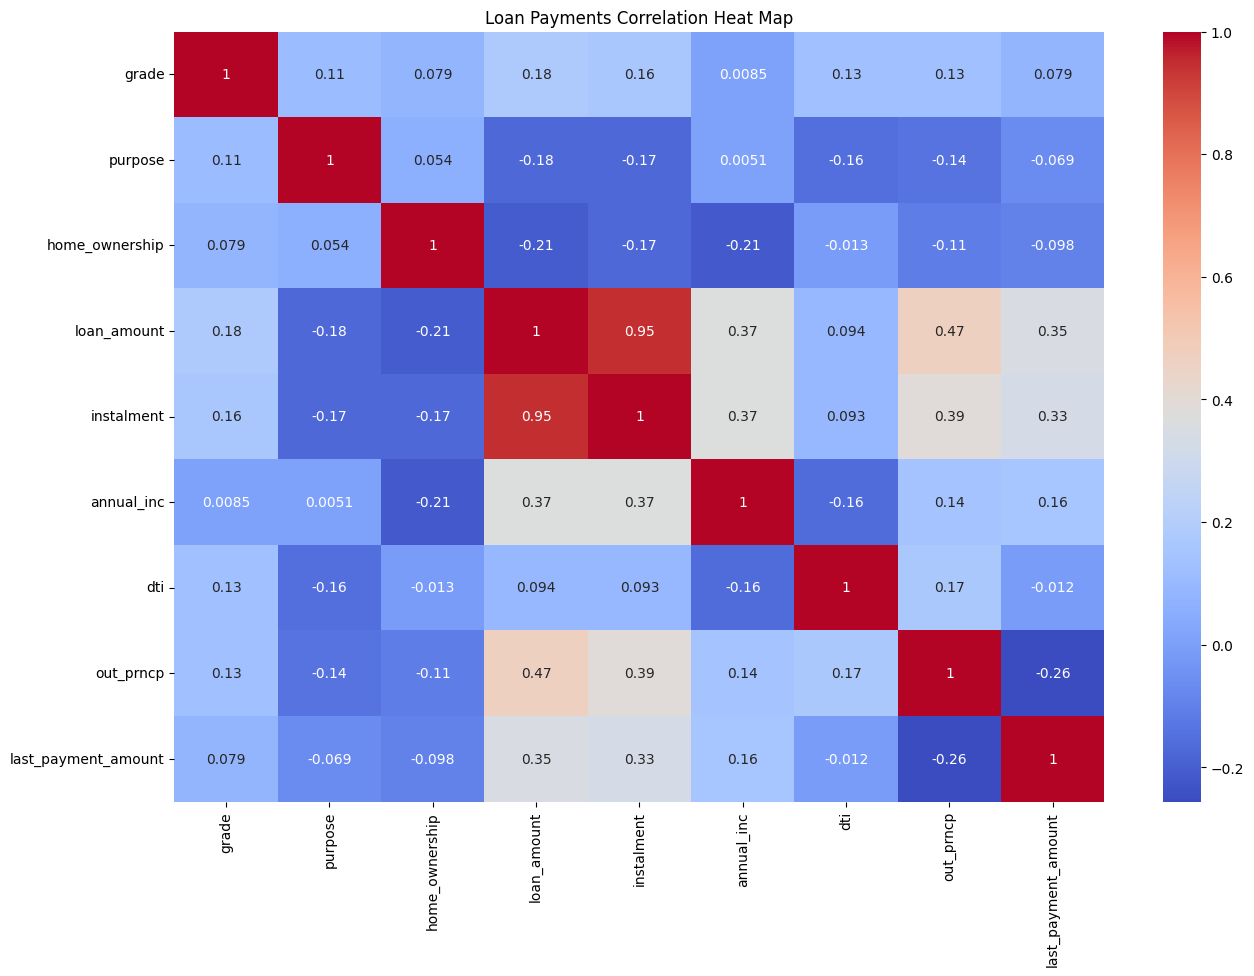

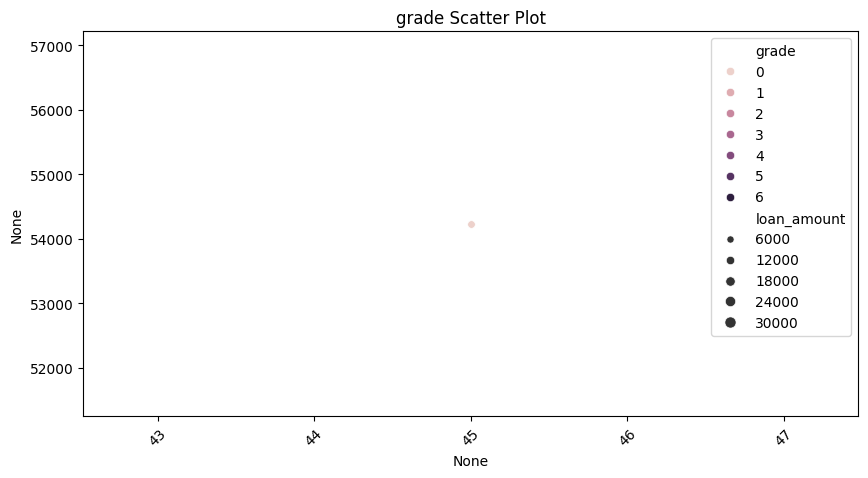

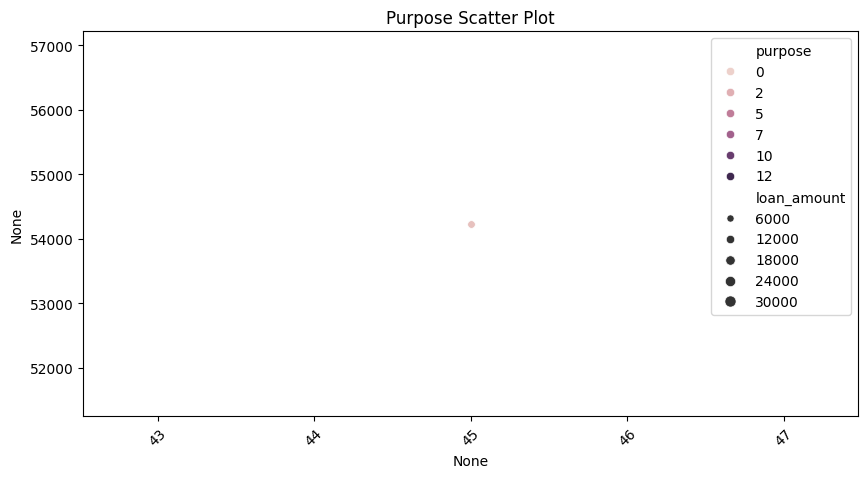

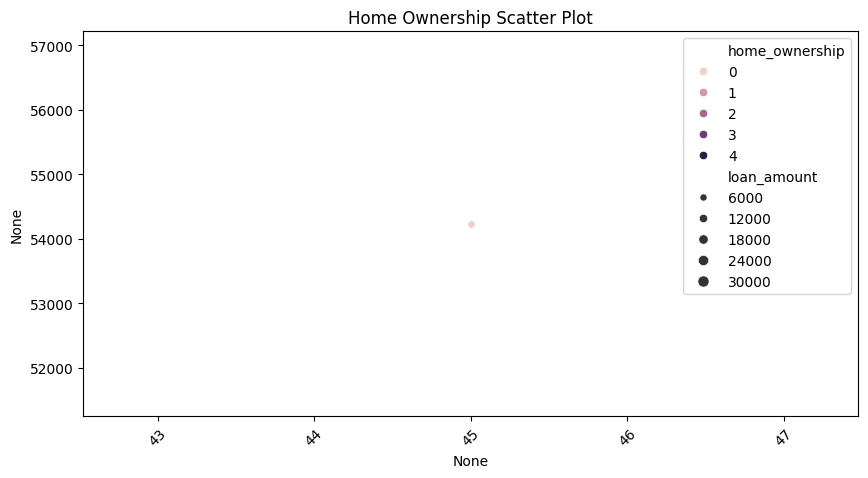

In [24]:
from sklearn import preprocessing 
import seaborn as sns
import matplotlib.pyplot as plt

# Key indicators 
#grade 
#purpose 
#home_ownership 

#need to convert categorical data to a format thats irritable 

label_encoder = preprocessing.LabelEncoder() 

#categorical columns to encode 
#cat_col = ['grade', 'purpose', 'home_ownership', ]

#encode grade
df['grade']= label_encoder.fit_transform(df['grade']) 
# view new codes 
df['grade'].unique() 

#ecode purpose 
df['purpose']= label_encoder.fit_transform(df['purpose']) 
# view new codes 
df['purpose'].unique() 

#encode home ownership
df['home_ownership']= label_encoder.fit_transform(df['home_ownership']) 
# view new codes 
df['home_ownership'].unique() 

#compare indicators in corelation matrix 

indicators = ['grade', 'purpose', 'home_ownership', 'loan_amount', 'instalment', 'annual_inc', 'dti', 'out_prncp', 'last_payment_amount' ]


def heat_map():
        """
        The function `heat_map` generates a correlation heat map for the loan payments data.
        """
        plt.figure(figsize=(15,10))
        sns.heatmap(df[indicators].corr(), annot=True, cmap="coolwarm")
        plt.title("Loan Payments Correlation Heat Map")
        plt.show()


heat_map()

# no significant coleration with key indicators so will check with scatter plots 

#shape error when using dataframe for data so converted arrays with pd.series 
filter_late = pd.Series(54231)
filter_charged_off =pd.Series(45)

def grade_scatter_plot():
        """
         The grade_scatter_plot function creates a scatter plot to display the relationship of grade with 
        loans that are charged off or late
        
        """
        plt.figure(figsize=(10,5))
        sns.scatterplot(x= filter_charged_off, y= filter_late, data=df, hue="grade", size="loan_amount")
        plt.xticks(rotation=45)
        plt.title("grade Scatter Plot")
        plt.show()

grade_scatter_plot()

def purpose_scatter_plot():
        """
         The purpose_scatter_plot function creates a scatter plot to display the relationship of purpose with 
        loans that are charged off or late
        
        """
        plt.figure(figsize=(10,5))
        sns.scatterplot(x= filter_charged_off, y= filter_late, data=df, hue="purpose", size="loan_amount")
        plt.xticks(rotation=45)
        plt.title("Purpose Scatter Plot")
        plt.show()

purpose_scatter_plot()

def home_ownership_scatter_plot():
        """
        The home_ownership_scatter_plot function creates a scatter plot to display the relationship of home_ownership with 
        loans that are charged off or late
        """
        plt.figure(figsize=(10,5))
        sns.scatterplot(x= filter_charged_off, y= filter_late, data=df, hue="home_ownership", size="loan_amount")
        plt.xticks(rotation=45)
        plt.title("Home Ownership Scatter Plot")
        plt.show()

home_ownership_scatter_plot()


